# Visión por Computador - Práctica 2 - Deep Learning en Computer Vision

#### 12 puntos   |   Fecha de entrega: 15 de Diciembre, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2425.ugr.es/

### Estudiante: CARMEN AZORÍN MARTÍ

In [1]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━

In [2]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='blue'>**Ejercicio 4: Primeros pasos de IA explicable aplicada a redes neuronales convolucionales (1,5 puntos)**
<font color='blue'>En este ejercicio trabajaremos con el conjunto de datos Caltech-UCSD Birds-200-2011 (https://www.vision.caltech.edu/datasets/cub_200_2011/). Este conjunto de datos consta de $11788$ imágenes de $200$ especies de aves diferentes. Tiene $200$ clases, con $5994$ para entrenamiento y $5794$ para pruebas. El $10\%$ del conjunto de entrenamiento se dejará para validación.

<font color='blue'>Usaremos el modelo de red ResNet18 ya preentrenado con ImageNet, que se puede descargar desde el repositorio de modelos de fastai. Se realizará un fine-tuning de toda la red (por $10$ épocas) tras haber incorporado una cabecera adecuada para este problema (con una única fully-connected layer). Es decir, se debe hacer algo similar a lo realizado en el apartado cuarto del ejercicio 3.





---



---



---

First, we need to read the data from the URL

In [3]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

In [4]:
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)
# !cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)


/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


In [5]:
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

In [6]:
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")


Number of examples per class
60 60 60 60 60 60 59 50 60 60 60 53 59 60 60 60 60 60 60 41 60 60 60 59 59 60 60 45 60 60 44 60 60 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 59 60 59 60 60 60 60 58 60 60 60 60 60 50 59 59 60 60 60 60 60 60 60 60 60 58 60 60 59 59 60 60 60 60 48 60 60 58 59 60 60 49 60 60 60 60 60 59 50 60 59 59 60 60 60 60 57 59 60 60 60 50 60 60 59 60 60 60 60 56 58 60 60 60 60 56 59 58 53 60 60 60 60 60 60 59 60 59 60 60 51 56 60 60 59 60 60 60 60 60 59 60 60 60 60 60 52 60 57 58 60 59 60 60 60 60 59 60 60 60 60 60 59 60 60 60 60 60 59 60 59 59 60 53 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 60 60 60 

In [7]:
#Ahora tenemos en images_list la lista con todas las imágenes, y en train_test_split cuáles pertenecen a training (1) o a test (0)
# Vamos a crear dos carpetas: una train y otra test, y vamos a meter dentro las imágenes correspondientes
print(path)
import shutil, os
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')


/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [8]:
print((path/'train').ls())
print(len((path/'train').ls()))

[Path('/root/.fastai/data/CUB_200_2011/train/098.Scott_Oriole'), Path('/root/.fastai/data/CUB_200_2011/train/102.Western_Wood_Pewee'), Path('/root/.fastai/data/CUB_200_2011/train/195.Carolina_Wren'), Path('/root/.fastai/data/CUB_200_2011/train/165.Chestnut_sided_Warbler'), Path('/root/.fastai/data/CUB_200_2011/train/142.Black_Tern'), Path('/root/.fastai/data/CUB_200_2011/train/129.Song_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/023.Brandt_Cormorant'), Path('/root/.fastai/data/CUB_200_2011/train/113.Baird_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/086.Pacific_Loon'), Path('/root/.fastai/data/CUB_200_2011/train/120.Fox_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/002.Laysan_Albatross'), Path('/root/.fastai/data/CUB_200_2011/train/032.Mangrove_Cuckoo'), Path('/root/.fastai/data/CUB_200_2011/train/009.Brewer_Blackbird'), Path('/root/.fastai/data/CUB_200_2011/train/183.Northern_Waterthrush'), Path('/root/.fastai/data/CUB_200_2011/train/038.Great_Crested_Fly

In [9]:
import os
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [10]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))


Total training images:  5994
Total test images:  5794


En el dataBlock indicaremos que se trata de un problema de clasificación de imágenes. Además, el dataloader contendrá solo las imágenes de entrenamiento.

El modelo de ResNet18 espera imágenes de entrada de 224x224, además de que estén normalizadas según las estadísticas de ImageNet. Esto se puede hacer en el datablock.

Numero de ejemplos de entrenamiento (una vez descartados los de validacion): 5395
Numero de ejemplos de validacion: 599


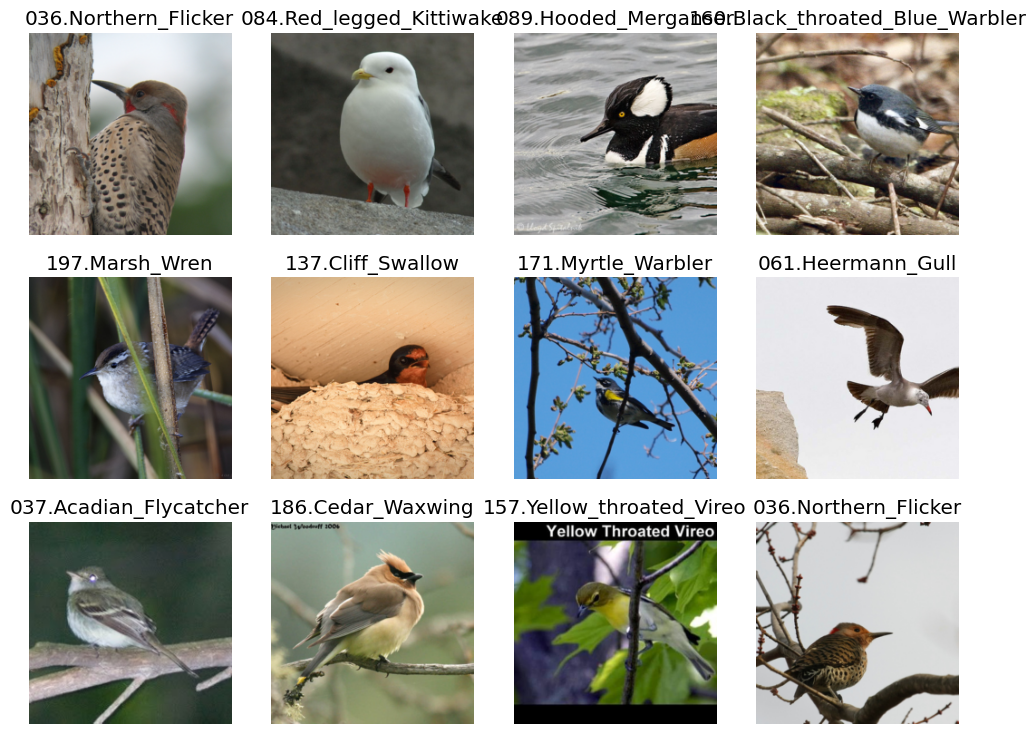

In [11]:
CUB_200_2011 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    # 10% para validación
    splitter=RandomSplitter(valid_pct=0.1,seed=42),
    get_y=parent_label,
    # reajustar la dimensión de las imágenes
    item_tfms=Resize(224),
    batch_tfms=[Normalize.from_stats(*imagenet_stats)]
)

dls = CUB_200_2011.dataloaders(path/'train',bs=32)

dls.show_batch(max_n=12)

print('Numero de ejemplos de entrenamiento (una vez descartados los de validacion):', len(dls.train_ds))
print('Numero de ejemplos de validacion:', len(dls.valid_ds))

In [12]:
from fastai.vision.models import resnet18

Para hacer fine-tuning del resNet18 tenemos que incorporar una cabecera adapatada a nuestro problema, es decir, con una salida de 200 neuronas (200 clases). De hacerlo se encargará Fastai, que incorporará una cabecera automática.

La función de pérdida que usemos será CrossEntropyLossFlat(), porque es la estándar que se usa en problemas de clasificación. Además, usaremos _pretarined=True_, para que se usen los pesos preentrenados de las capas convolucionales.

Por tanto, tenemos que las únicas capas entrenables son: las capas de la cabecera (fully connected) y las de batch normalization (para que se adapte a nuestros ejemplos).

In [13]:
model = resnet18
learn = vision_learner(dls, model, loss_func=CrossEntropyLossFlat(),
                       metrics=[accuracy,F1Score(average='weighted')],pretrained=True)
learn.summary()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 181MB/s]


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

Para entrenar nuestro modelo se usará _fine_tune_, que lo que hace es entrenar sólo los pesos entrenables, es decir, los de la cabecera (la última capa) durante la primera época. Después descongela todos los pesos de todas las capas y los entrena usando _fit_one_cycle_ con el número de épocas indicado (10).

In [14]:
learn.fine_tune(10)

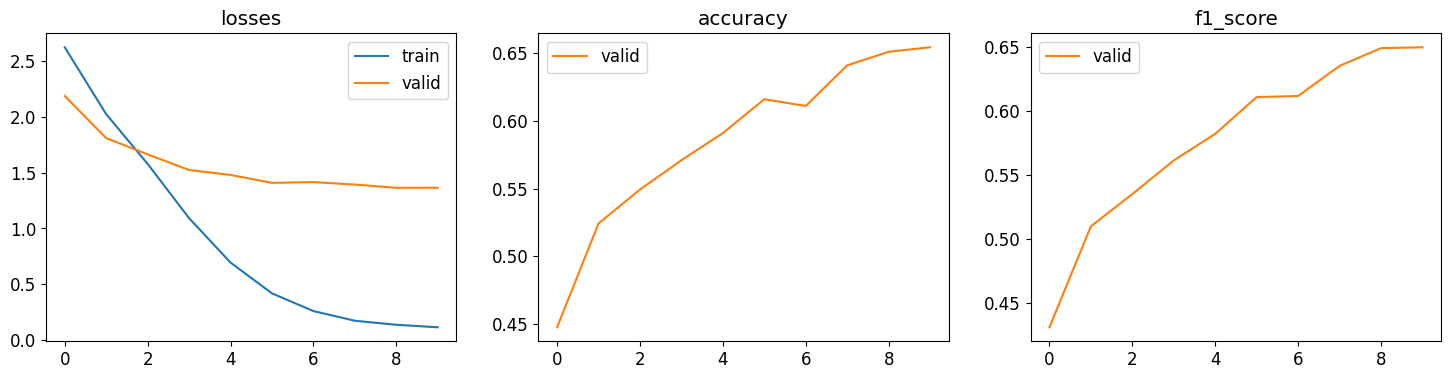

In [15]:
learn.recorder.plot_metrics()

In [16]:
results = learn.validate()
print(f"Val Loss: {results[0]:.4f}, Acc: {results[1]:.4f}, F1: {results[2]:.4f}")

test_dl = learn.dls.test_dl(files_test,with_labels=True)
results_test = learn.validate(dl=test_dl)
print(f"Test Loss: {results[0]:.4f}, Acc: {results[1]:.4f}, F1: {results[2]:.4f}")

Val Loss: 1.3643, Acc: 0.6544, F1: 0.6498


Test Loss: 1.3643, Acc: 0.6544, F1: 0.6498


Vemos que nuestro modelo es relativamente bueno. Tiene una accuracy elevada tanto para validation como para test, lo que indica que puede predecir nuevos ejemplos de forma relativamente buena.

## <font color='blue'> Uso de GradCAM para analizar el comportamiento de redes convolucionales

<font color='blue'> Una vez entrenado el modelo, se debe aplicar Grad-CAM para visualizar los mapas de activación del último bloque convolucional. Para ello, los alumnos deben emplear el paquete `grad-cam`: `!pip install grad-cam`. Se trata de una librería con métodos del estado del arte para dotar de explicabilidad a modelos de visión por computador. Se recomienda encarecidamente revisar con calma la documentación relativa a dicho paquete (https://jacobgil.github.io/pytorch-gradcam-book/introduction.html y https://github.com/jacobgil/pytorch-grad-cam) y basarse en los ejemplos allí indicados de cara a realizar la implementación. El alumnado debe emplear Grad-CAM con, al menos, $5$ imágenes de test, así como interpretar los resultados obtenidos.

<font color='blue'> ¿En qué consiste Grad-CAM: cómo funciona y para qué sirve?


<font color='blue'> Referencia: https://arxiv.org/pdf/1610.02391.pdf

In [17]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39588 sha256=638a15535048377cb7ae6efeda10cbd122cab400d6d9f7c5bbd532414ce8f3d1
  Stored in directory: /root/.cache/pip/wheels/50/b0/82/1f97b5348c7fe9f0ce0ba18497202cafa5dec4562bd5292680
Successfully built grad-cam


Imágenes seleccionadas para Grad-CAM:
[Path('/root/.fastai/data/CUB_200_2011/test/098.Scott_Oriole/Scott_Oriole_0073_92369.jpg'), Path('/root/.fastai/data/CUB_200_2011/test/098.Scott_Oriole/Scott_Oriole_0028_92270.jpg'), Path('/root/.fastai/data/CUB_200_2011/test/098.Scott_Oriole/Scott_Oriole_0002_795829.jpg'), Path('/root/.fastai/data/CUB_200_2011/test/102.Western_Wood_Pewee/Western_Wood_Pewee_0019_795046.jpg'), Path('/root/.fastai/data/CUB_200_2011/test/102.Western_Wood_Pewee/Western_Wood_Pewee_0061_795060.jpg')]
Imagen 1: Clase Real - 098.Scott_Oriole, Predicción - 098.Scott_Oriole
Mapa Grad-CAM guardado en gradcam_image_1.jpg


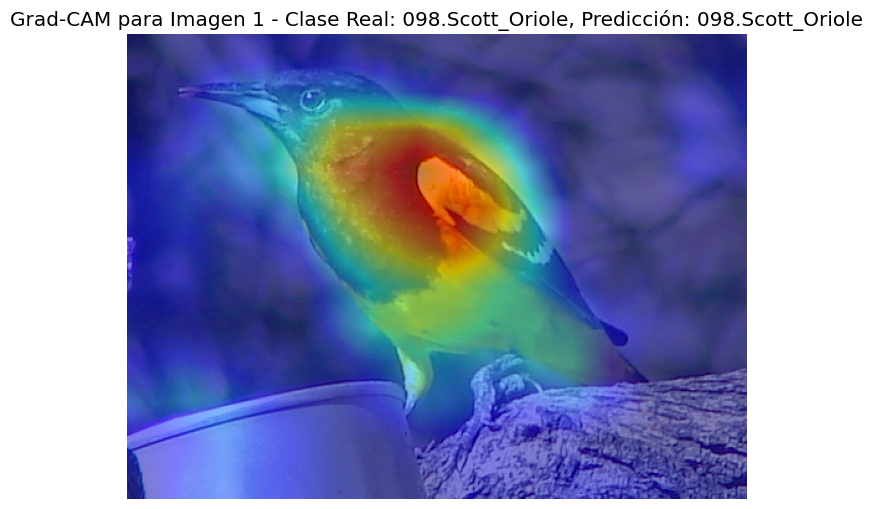

Imagen 2: Clase Real - 098.Scott_Oriole, Predicción - 175.Pine_Warbler
Mapa Grad-CAM guardado en gradcam_image_2.jpg


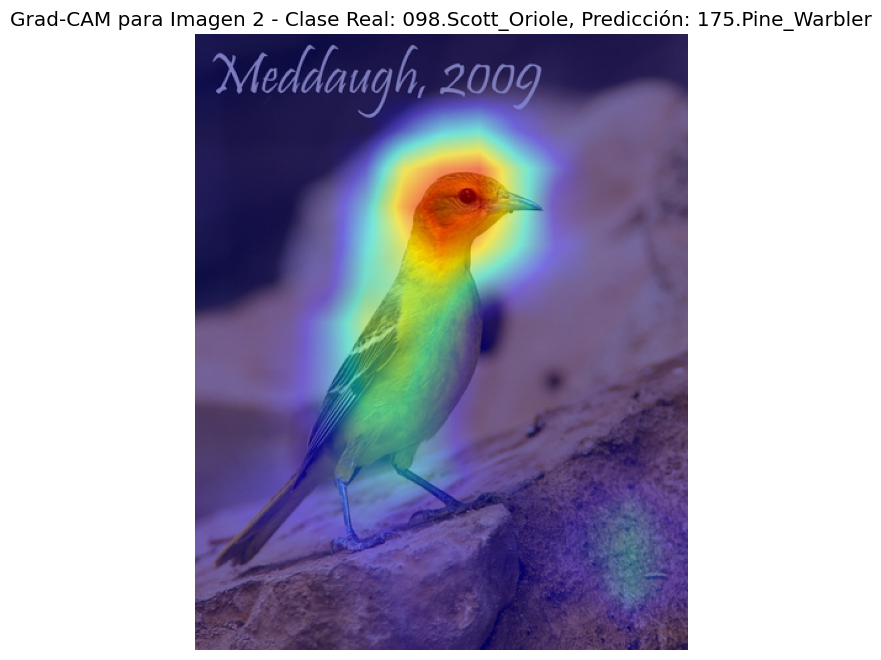

Imagen 3: Clase Real - 098.Scott_Oriole, Predicción - 098.Scott_Oriole
Mapa Grad-CAM guardado en gradcam_image_3.jpg


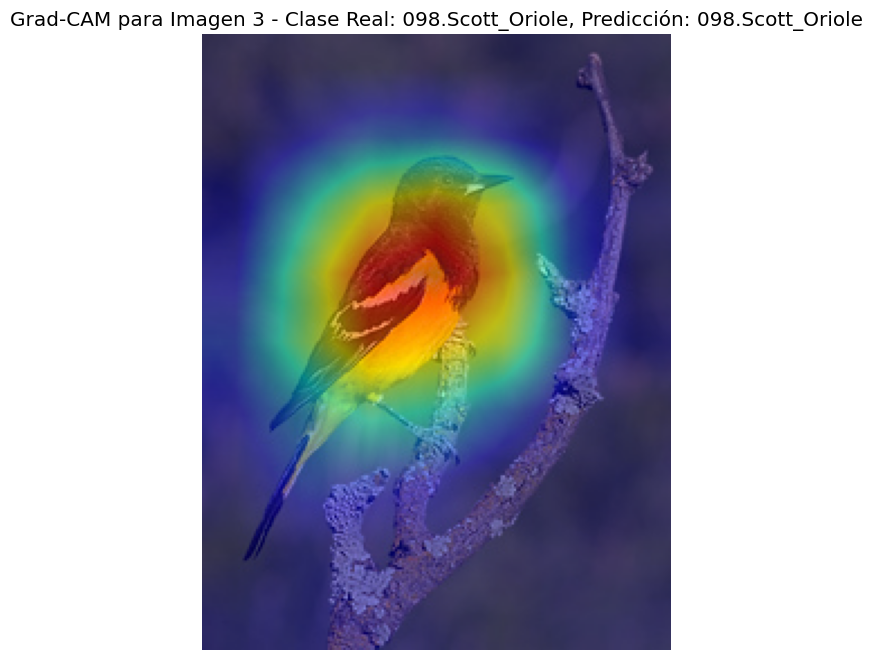

Imagen 4: Clase Real - 102.Western_Wood_Pewee, Predicción - 040.Olive_sided_Flycatcher
Mapa Grad-CAM guardado en gradcam_image_4.jpg


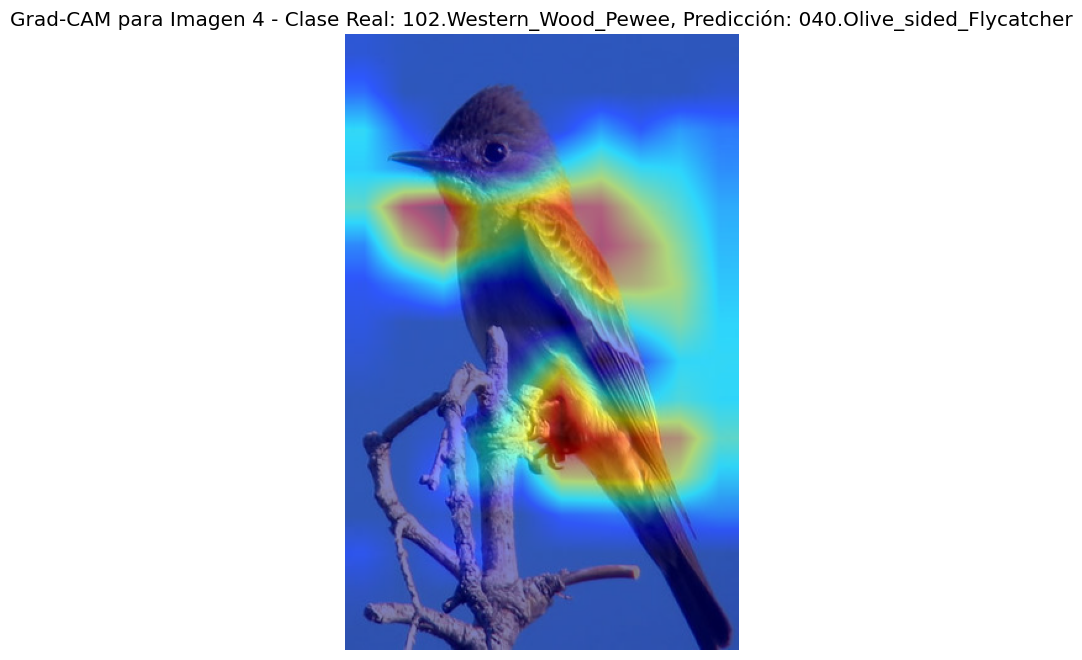

Imagen 5: Clase Real - 102.Western_Wood_Pewee, Predicción - 043.Yellow_bellied_Flycatcher
Mapa Grad-CAM guardado en gradcam_image_5.jpg


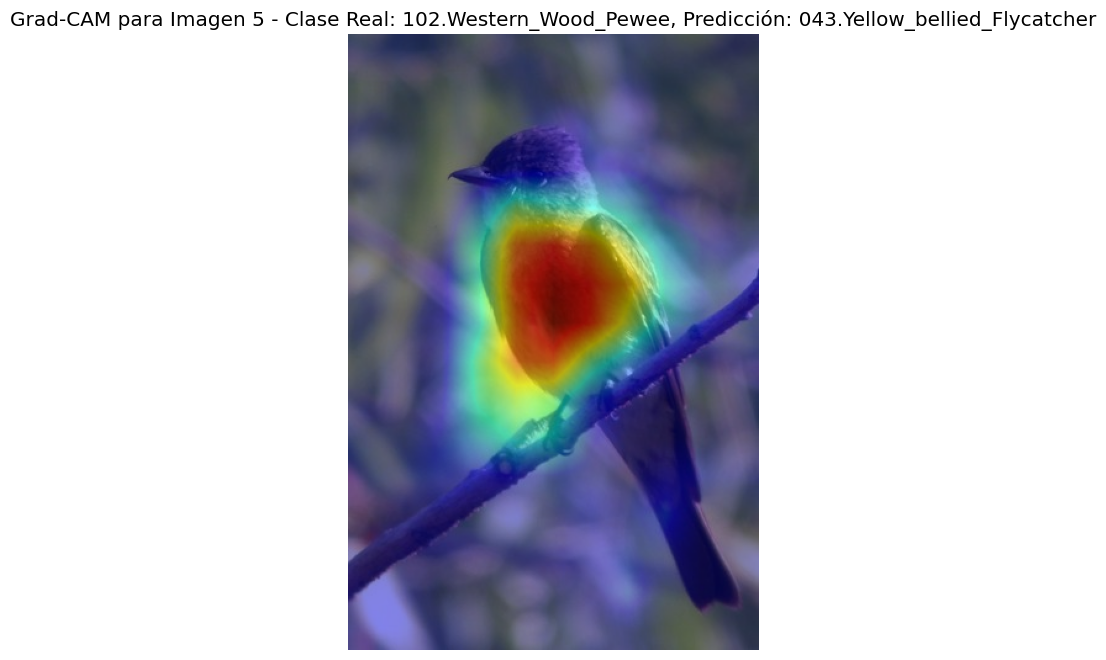

Proceso de Grad-CAM finalizado para las imágenes seleccionadas.


In [31]:
from fastai.vision.all import *
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import numpy as np
import cv2

# obtenemos imágenes de test con índices 0, 10, 20, 30, 40
sample_test_images = [files_test[i] for i in [0, 10, 20, 30, 43]]
print("Imágenes seleccionadas para Grad-CAM:")
print(sample_test_images)

# cargamos las imágenes como tensor
images = [ PILImage.create(img) for img in sample_test_images ]

# obtenemos las clases del modelo
class_labels = dls.vocab

# seleccionamos la capa para Grad-CAM (última capa convolucional de nuestro modelo)
target_layer = learn.model[0][-1]

# creamos la instancia de Grad-CAM
cam = GradCAM(model=learn.model, target_layers=[target_layer])

# verificamos dispositivo (CPU o GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
learn.model.to(device)

for i, (img_path, img) in enumerate(zip(sample_test_images, images)):
    # preprocesamos la imagen
    input_tensor = preprocess_image(np.array(img), mean=imagenet_stats[0], std=imagenet_stats[1])
    input_tensor = input_tensor.to(device)

    # obtenemos la clase real del pájaro
    true_class = img_path.parent.name

    # obtenemos la clase más probable
    outputs = learn.model(input_tensor)
    predicted_class = torch.argmax(outputs, dim=1).item()
    print(f"Imagen {i+1}: Clase Real - {true_class}, Predicción - {class_labels[predicted_class]}")

    # generamos el mapa de Grad-CAM
    targets = [ClassifierOutputTarget(predicted_class)]
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

    # convertimos el mapa a colores y lo superponemos sobre la imagen original
    grayscale_cam = grayscale_cam[0, :]
    original_image = np.array(img) / 255.0
    cam_image = show_cam_on_image(original_image, grayscale_cam, use_rgb=True)

    # Guardamos la nueva imagen
    cam_image_bgr = cv2.cvtColor(cam_image, cv2.COLOR_RGB2BGR)
    output_path = f"gradcam_image_{i+1}.jpg"
    cv2.imwrite(output_path, cam_image_bgr)
    print(f"Mapa Grad-CAM guardado en {output_path}")

    # mostramos la imagen con Grad-CAM
    plt.figure(figsize=(8, 8))
    plt.imshow(cam_image)
    plt.title(f"Grad-CAM para Imagen {i+1} - Clase Real: {true_class}, Predicción: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()

print("Proceso de Grad-CAM finalizado para las imágenes seleccionadas.")


## Explicación

**¿Para qué sirve Grad-CAM?**

Grad-CAM se usa para interpretar y y visualizar las áreas de una imagen que el modelo considera más relevantes para clasificarla.

**¿Cómo funciona?**

La idea es identificar una capa como la capa objetivo, en nuestro caso es la última capa convolucional del modelo entrenado. Se usa esta capa porque contiene características espaciales de alto nivel, cruciales para la clasificación.

Luego, Grad-CAM calcula los gradientes de la predicción de la clase objetivo con respecto a los mapas de características de la capa seleccionada. Estos gradientes indican la importancia de cada filtro de la capa en relación con la clase.

Los gradientes obtenidos se promedian globalmente para darle un peso a cada filtro, que indica la contribución de cada mapa de características al resultado.

Haciendo una combinación lineal de los mapas de características ponderados, se genera un mapa de activación que resalta las regiones más importantes de la imagen que el modelo usa para decidir.

Este mapa de activación se superpone en la imagen original para visualizar las áreas clave de la imagen.

**Interpretación de los resultados**

En la primera imagen vemos que la etiqueta real y la predicha son iguales, es decir, la predicción es correcta. Vemos que el mapa de activación resalta la mancha del ala del pájaro, que probablemente sea una característica clave en este tipo de pájaros y, por eso, lo detecta correctamente.

La segunda imagen tiene una predicción incorrecta. El mapa de activación nos muestra que se fija principalmente en la cabeza del pájaro, lo que no es especialmente revelador para esta especie. Tal vez el cuerpo o el pico son características más importantes.

En cuanto a la tercera imagen, la predicción es correcta. El pájaro es el mismo que en la primera imagen y vemos que también le da importancia al ala para tomar una decisión.

La cuarta imagen tiene una predicción incorrecta. Vemos que le ha dado importancia a zonas de la imagen donde apenas aparece el pájaro, esto explica el resultado de la predicción.

Finalmente, la quinta imagen también tiene una predicción incorrecta. Aunque las zonas relevantes señalan el cuerpo del pájaro, tal vez para esta especie lo más importante sea la cabeza o las patas y por eso obtenemos ese resultado.